<a href="https://colab.research.google.com/github/narwadepooja/Customer_Segmentation_using_ML/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation using Machine Learning**

In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
#Reading the excel file
data=pd.read_csv("/content/Mall_Customers.csv")

**Data Exploration**

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Mail Id
0,1,Male,19,15,39,narwadepooja05@gmail.com
1,2,Male,21,15,81,poojanarwade355@gmail.com
2,3,Female,20,16,6,narwadeswapnil543@gmail.com
3,4,Female,23,16,77,gunjanmehta574@gmail.com
4,5,Female,31,17,40,narwade.swapnil2004@gmail.com


In [ ]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
Mail Id                   object
dtype: object

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Data Visualization**

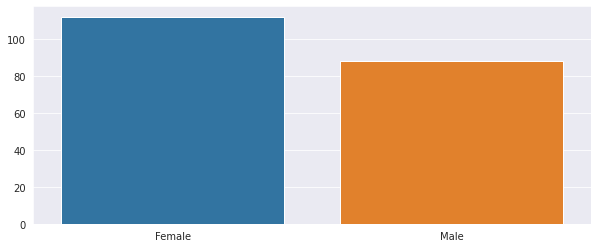

In [ ]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


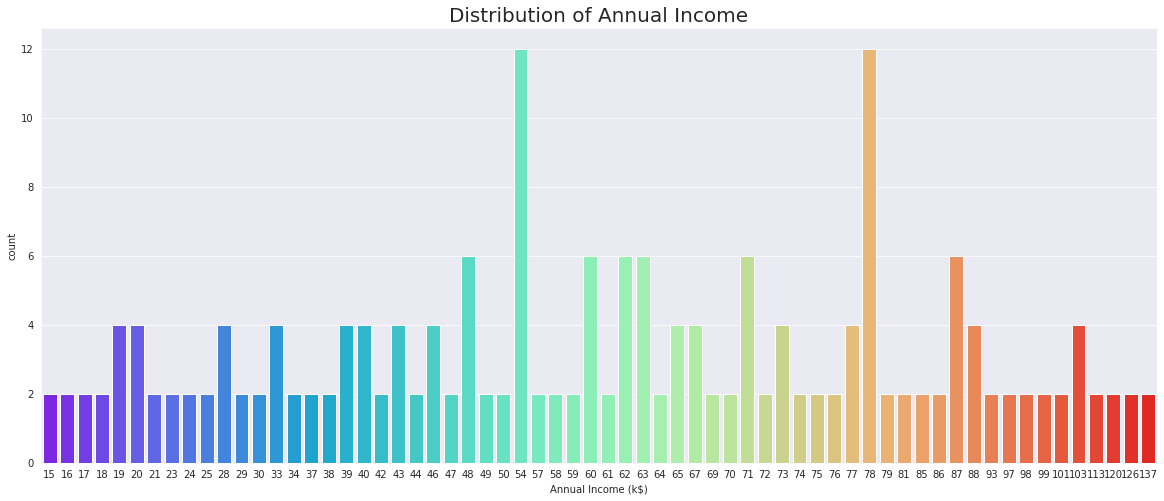

In [ ]:

plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


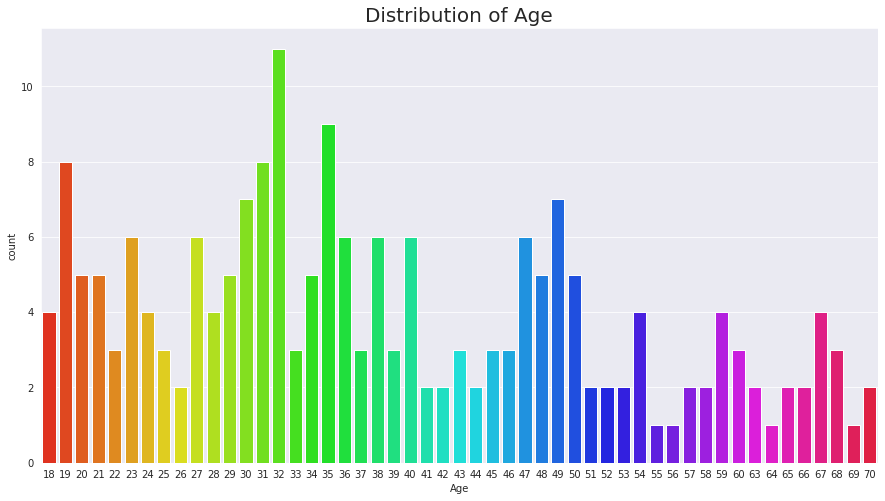

In [ ]:
#Distribution of age
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


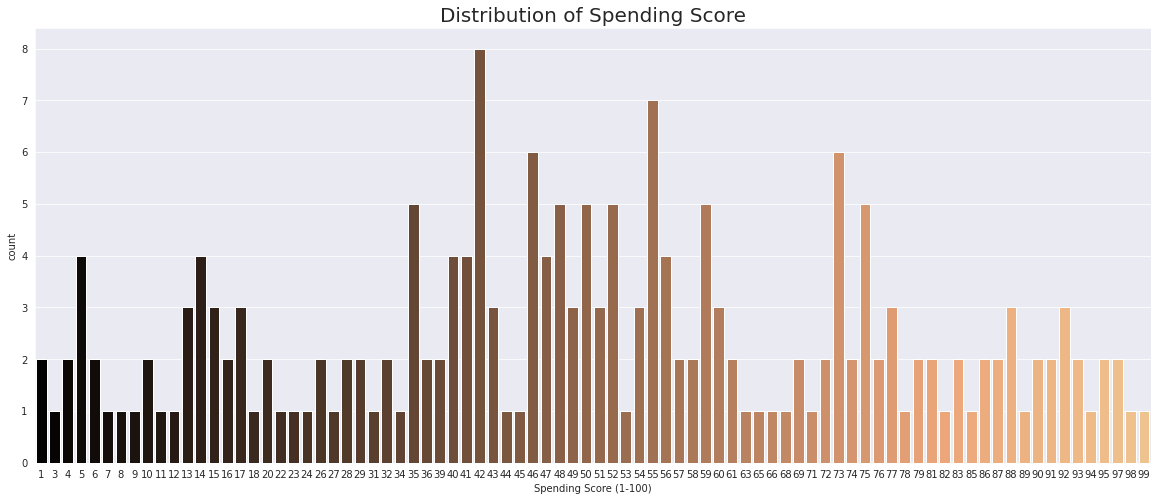

In [ ]:
#Distribution of spending score
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


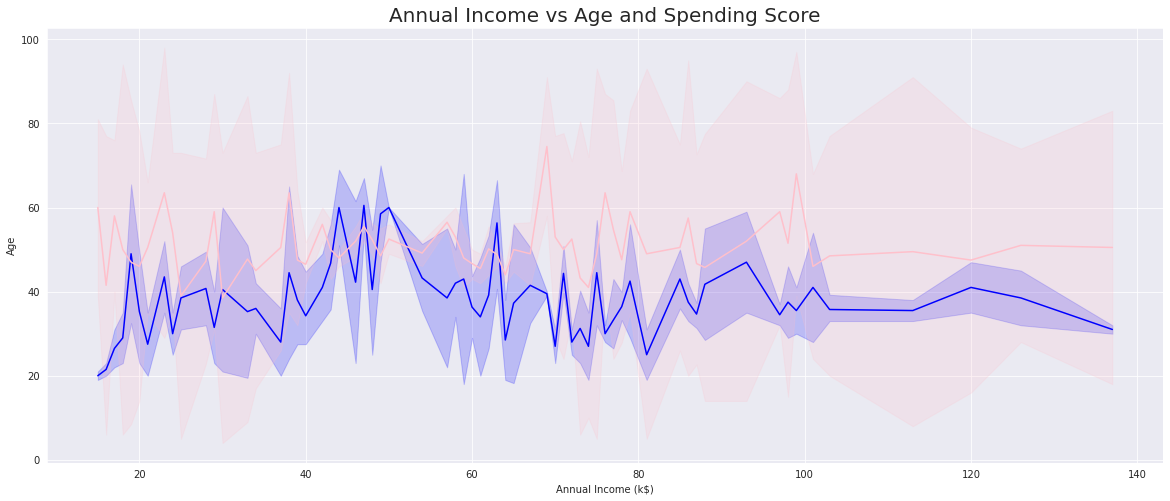

In [ ]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

In [ ]:
#We take just the Annual Income and Spending score
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)","Mail Id"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [ ]:
#The input data
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


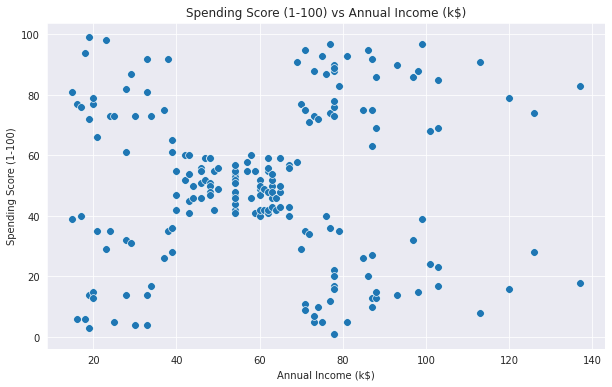

In [ ]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

**Data Preparation**

In [ ]:
data.isnull().any().any()

False

In [ ]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Mail Id                   0
dtype: int64

**Model Implementation**

In [ ]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

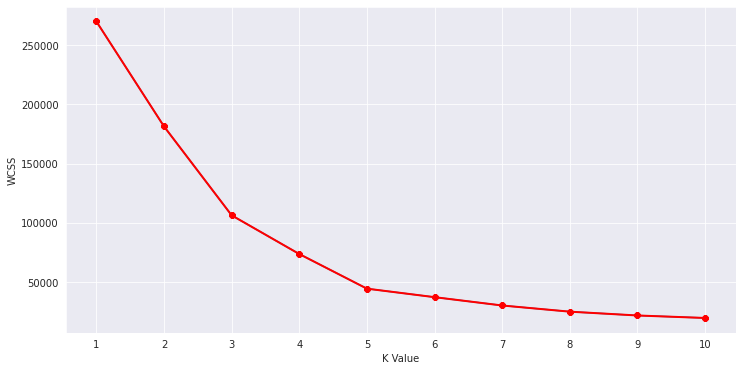

In [ ]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Mail Id,label
0,1,Male,19,15,39,narwadepooja05@gmail.com,4
1,2,Male,21,15,81,poojanarwade355@gmail.com,3
2,3,Female,20,16,6,narwadeswapnil543@gmail.com,4
3,4,Female,23,16,77,gunjanmehta574@gmail.com,3
4,5,Female,31,17,40,narwade.swapnil2004@gmail.com,4


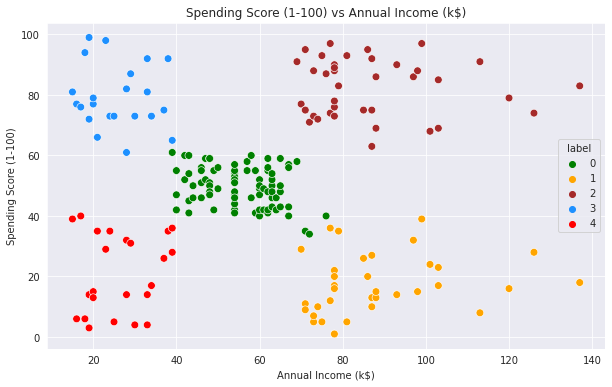

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

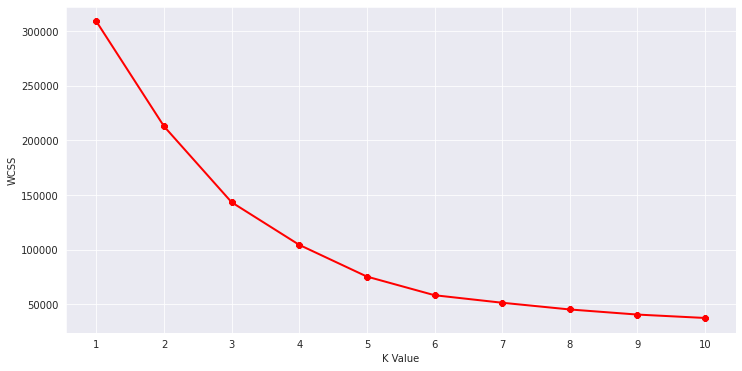

In [ ]:
df2=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)","Mail Id"]]
#Taking the features
X2=df2[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df2["label"] = y2
#The data with labels
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Mail Id,label
0,1,Male,19,15,39,narwadepooja05@gmail.com,7
1,2,Male,21,15,81,poojanarwade355@gmail.com,2
2,3,Female,20,16,6,narwadeswapnil543@gmail.com,4
3,4,Female,23,16,77,gunjanmehta574@gmail.com,2
4,5,Female,31,17,40,narwade.swapnil2004@gmail.com,7


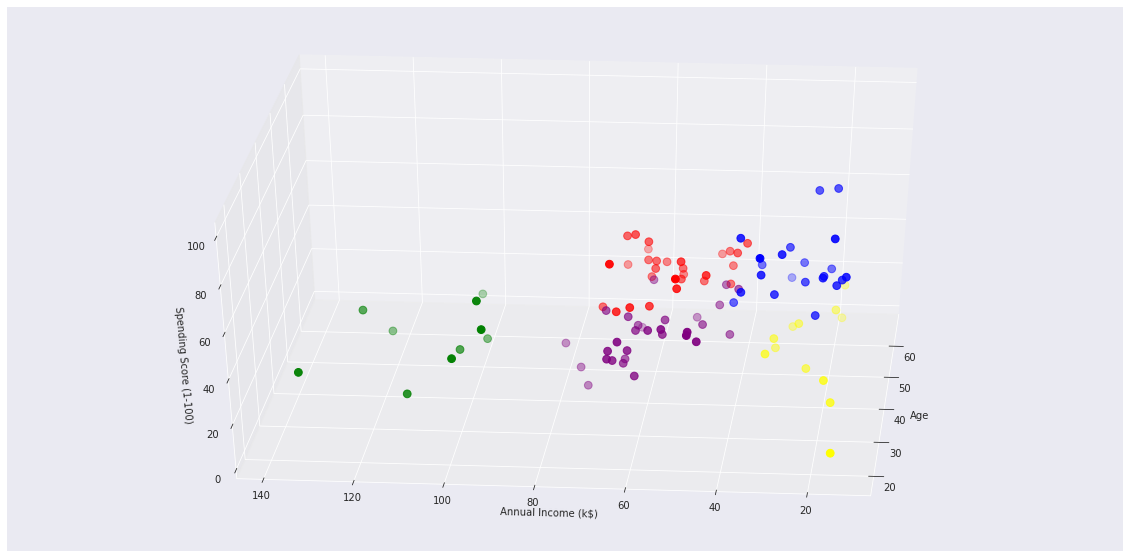

In [ ]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0], c='purple', s=60)
ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='red', s=60)
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='blue', s=60)
ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='green', s=60)
ax.scatter(df2.Age[df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [ ]:
cust1=df2[df2["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df2[df2["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df2[df2["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df2[df2["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df2[df2["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)

Number of customer in 1st group= 29
They are - [ 47  51  55  56  57  60  67  72  77  78  80  82  84  86  90  93  94  97
  99 102 105 108 113 118 119 120 122 123 127]
--------------------------------------------
Number of customer in 2nd group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 3rd group= 30
They are - [ 44  48  52  53  59  62  66  69  70  76  79  85  88  89  92  95  96  98
 100 101 104 106 112 114 115 116 121 125 133 143]
--------------------------------------------
Number of customer in 4th group= 10
They are - [181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 5th group= 12
They are - [ 3  7  9 11 13 15 23 25 31 33 35 37]


In [ ]:
cust1=df2[df2["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["Mail Id"].values)
print("--------------------------------------------")
cust2=df2[df2["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["Mail Id"].values)
print("--------------------------------------------")
cust3=df2[df2["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["Mail Id"].values)
print("--------------------------------------------")
cust4=df2[df2["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["Mail Id"].values)
print("--------------------------------------------")
cust5=df2[df2["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["Mail Id"].values)

Number of customer in 1st group= 29
They are - ['nilmahajan06@gmail.com' 'narwadeswapnil543@gmail.com'
 'nilmahajan06@gmail.com' 'divyasamse22@gmail.com'
 'narwadepooja05@gmail.com' 'gunjanmehta574@gmail.com'
 'narwadeswapnil543@gmail.com' 'divyasamse22@gmail.com'
 'narwade.swapnil2004@gmail.com' 'poojanarwade48@gmail.com'
 'divyasamse22@gmail.com' 'poojanarwade355@gmail.com'
 'gunjanmehta574@gmail.com' 'poojanarwade48@gmail.com'
 'poojanarwade355@gmail.com' 'narwade.swapnil2004@gmail.com'
 'poojanarwade48@gmail.com' 'narwadepooja05@gmail.com'
 'narwadeswapnil543@gmail.com' 'poojanarwade48@gmail.com'
 'narwadepooja05@gmail.com' 'gunjanmehta574@gmail.com'
 'narwadepooja05@gmail.com' 'poojanarwade48@gmail.com'
 'nilmahajan06@gmail.com' 'divyasamse22@gmail.com'
 'poojanarwade355@gmail.com' 'narwadeswapnil543@gmail.com'
 'nilmahajan06@gmail.com']
--------------------------------------------
Number of customer in 2nd group= 22
They are - ['poojanarwade355@gmail.com' 'gunjanmehta574@gmail.co

In [ ]:
print(cust1)

     CustomerID  Gender  ...                        Mail Id  label
46           47  Female  ...         nilmahajan06@gmail.com      1
50           51  Female  ...    narwadeswapnil543@gmail.com      1
54           55  Female  ...         nilmahajan06@gmail.com      1
55           56    Male  ...         divyasamse22@gmail.com      1
56           57  Female  ...       narwadepooja05@gmail.com      1
59           60    Male  ...       gunjanmehta574@gmail.com      1
66           67  Female  ...    narwadeswapnil543@gmail.com      1
71           72  Female  ...         divyasamse22@gmail.com      1
76           77  Female  ...  narwade.swapnil2004@gmail.com      1
77           78    Male  ...       poojanarwade48@gmail.com      1
79           80  Female  ...         divyasamse22@gmail.com      1
81           82    Male  ...      poojanarwade355@gmail.com      1
83           84  Female  ...       gunjanmehta574@gmail.com      1
85           86    Male  ...       poojanarwade48@gmail.com   

In [ ]:
feature = [[30,20]]
p = km1.predict(feature)
#n_feature = np.array(feature).reshape(1,-1).format(array)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(p)


[4]
